In [1]:
# Importing pandas, numpy and other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

In [2]:
#Reading the CSV file, adding low_memory to resolve the warning.
loan_df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
loan_df.shape

(39717, 111)

Data Cleaning, there are 111 columns, so will first identify columns which are not relevant viz. missing information,will start with 90 and then remove accordingly. 

In [5]:
missing_columns = loan_df.isnull().sum()/len(loan_df.id)
print("No of Columns missing information is: ",len(missing_columns.loc[missing_columns > .90]))
missing_columns[missing_columns > 0.90].index

No of Columns missing information is:  56


Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

As seen above, we have 56 columns having more than 90% null values, so will be dropping all these columns.

In [6]:
# Dropping columns having more than 90% null values
loan_df = loan_df.drop(missing_columns[missing_columns > 0.9].index,axis=1)

In [7]:
# Finding null value percentage for columns after droping the above columns
loan_df.isnull().sum()/len(loan_df.id) 

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [8]:
# desc column contains around 32% null values and does not appear helpful for analysis.
loan_df = loan_df.drop('desc',axis=1)

In [9]:
# Identify columns which has same value throughout the dataset.
loan_df.loc[:,loan_df.apply(pd.Series.nunique) == 1].columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [10]:
# Dropping above columns as these have 1 value so not much useful in analysis.
loan_df.drop(columns=['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], inplace = True)

In [11]:
loan_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13

In [12]:
# Removing 2 additional columns URL and zip as they are not useful for any analysis, reason zip is not useful is because of masked zip codes("xx") at the end.
loan_df.drop(columns=['zip_code','url','id','member_id'], inplace = True)

In [13]:
loan_df.shape

(39717, 41)

In [14]:
# Sum of null values in columns
loan_df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymn

In [15]:
# Dropping mths_since_last_delinq column as 64% rows(25682) have no values available.
loan_df.drop(columns=['mths_since_last_delinq'], inplace = True)

In [16]:
# loan_df.shape

Now that columns have been removed, will remove rows so with blank/missing values(viz. emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies).

In [17]:
# Removing rows containing null values
loan_df = loan_df[~loan_df.emp_title.isnull()]
loan_df = loan_df[~loan_df.emp_length.isnull()]
loan_df = loan_df[~loan_df.title.isnull()]
loan_df = loan_df[~loan_df.revol_util.isnull()]
loan_df = loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df = loan_df[~loan_df.last_credit_pull_d.isnull()]
loan_df = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [18]:
# Check once for sum of null values
loan_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

Removing Current loan rows as they can be considered neither defaulter or non-defaulter.

In [19]:
# Removing current loan_status records, post removing records, drop any duplicates that might exist.
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.drop_duplicates()
loan_df.shape

(35367, 40)

In [20]:
# Creating new dataframe to back up current dataframe
loan_cleaned = loan_df

In [21]:
loan_cleaned.nunique().sort_values()

out_prncp_inv                  1
out_prncp                      1
term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             509
loan_amnt                    847
funded_amnt                 1001
revol_util                  1081
total_rec_late_fee          1163
collection_recovery_fee     2386
dti                         2842
recoveries                  3585
annual_inc                  4831
total_rec_

In [22]:
loan_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [23]:
# Rounding below columns to 2 digit after dot
loan_cleaned.total_pymnt = round(loan_cleaned.total_pymnt,2)
loan_cleaned.total_rec_late_fee = round(loan_cleaned.total_rec_late_fee,2)
loan_cleaned.collection_recovery_fee = round(loan_cleaned.collection_recovery_fee,2)

In [24]:
# Converting below columns to datetime format
loan_cleaned.issue_d = pd.to_datetime(loan_cleaned.issue_d, format='%b-%y')
loan_cleaned.earliest_cr_line = pd.to_datetime(loan_cleaned.earliest_cr_line, format='%b-%y')
loan_cleaned.last_pymnt_d = pd.to_datetime(loan_cleaned.last_pymnt_d, format='%b-%y')
loan_cleaned.last_credit_pull_d = pd.to_datetime(loan_cleaned.last_credit_pull_d, format='%b-%y')

In [25]:
datetime_column = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [26]:
loan_cleaned[datetime_column].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             35367 non-null  datetime64[ns]
 1   earliest_cr_line    35367 non-null  datetime64[ns]
 2   last_pymnt_d        35367 non-null  datetime64[ns]
 3   last_credit_pull_d  35367 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.3 MB


In [27]:
loan_cleaned.int_rate.describe()

count      35367
unique       334
top       10.99%
freq         862
Name: int_rate, dtype: object

In [28]:
# Removing percentage symbol and converting to float in int_rate column
loan_cleaned.int_rate = loan_cleaned.int_rate.str.strip('%').astype(float)

In [29]:
# Removing percentage symbol and converting to float in revol_util column
loan_cleaned.revol_util = loan_cleaned.revol_util.str.strip('%').astype(float)

In [30]:
# Column info after cleaning
loan_cleaned[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    35367 non-null  float64
 1   revol_util  35367 non-null  float64
dtypes: float64(2)
memory usage: 828.9 KB


In [31]:
len_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [32]:
# Cleaning emp_length column
loan_cleaned = loan_cleaned.replace({"emp_length":len_dict})

In [33]:
loan_cleaned.emp_length.value_counts()

10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

In [34]:
# Cleaning term column
loan_cleaned.term.value_counts()

 36 months    26377
 60 months     8990
Name: term, dtype: int64

In [35]:
loan_cleaned.term = loan_cleaned.term.str.slice(0,3)

In [36]:
# Creating earliest_cr_line_month and earliest_cr_line_year columns by extracting earliest_cr_line column
loan_cleaned['earliest_cr_line_month'] = loan_cleaned['earliest_cr_line'].dt.month
loan_cleaned['earliest_cr_line_year'] = loan_cleaned['earliest_cr_line'].dt.year

In [37]:
# Few years are greater than today' date. So subtracting with 100 considering as an error
loan_cleaned[loan_cleaned['earliest_cr_line_year'] > 2020 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

In [38]:
loan_cleaned.earliest_cr_line_year.value_counts()

2000    2947
1999    2695
1998    2569
2001    2308
1997    2207
1996    2003
1995    1903
1994    1785
2002    1762
2003    1698
2004    1606
2005    1381
1993    1347
2006    1065
1992     937
1990     915
1991     853
1989     755
2007     655
1988     643
1987     539
1986     428
1985     385
1984     349
1983     282
1982     188
1981     149
1980     145
2008     139
1979     133
1978     126
1977      87
1976      70
1975      57
1974      49
1973      39
1970      35
1971      33
1972      29
1969      22
2068      12
2067      12
2066       7
2065       5
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

In [39]:
# Few years are greater than today' date. So subtracting with 100 considering as an error
loan_cleaned.earliest_cr_line_year = loan_cleaned.earliest_cr_line_year.apply(lambda x : (x - 100) if x > 2011 else x)

In [40]:
loan_cleaned.earliest_cr_line_year.value_counts()

2000    2947
1999    2695
1998    2569
2001    2308
1997    2207
1996    2003
1995    1903
1994    1785
2002    1762
2003    1698
2004    1606
2005    1381
1993    1347
2006    1065
1992     937
1990     915
1991     853
1989     755
2007     655
1988     643
1987     539
1986     428
1985     385
1984     349
1983     282
1982     188
1981     149
1980     145
2008     139
1979     133
1978     126
1977      87
1976      70
1975      57
1974      49
1973      39
1970      35
1971      33
1972      29
1969      22
1967      12
1968      12
1966       7
1965       5
1963       4
1962       3
1964       2
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

In [41]:
# Extracting month and year as separate column from issue_d
loan_cleaned['issued_month'] = loan_cleaned['issue_d'].dt.month
loan_cleaned['issued_year'] = loan_cleaned['issue_d'].dt.year

In [42]:
loan_cleaned.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issued_month,issued_year
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,Starbucks,0,RENT,15000.00,Verified,2011-12-01,Charged Off,other,Building my credit history.,TX,18.08,0,2004-09-01,0,2,0,9279,36.50,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.0,9,2004,12,2011
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,High intrest Consolidation,AZ,16.12,0,1998-01-01,2,14,0,4032,20.60,23,0.0,0.0,7678.02,7678.02,6500.00,1178.02,0.00,0.00,0.00,2013-06-01,1655.54,2015-12-01,0.0,1,1998,12,2011
11,12000,12000,12000.00000,36,12.69,402.54,B,B5,UCLA,10,OWN,75000.00,Source Verified,2011-12-01,Fully Paid,debt_consolidation,Consolidation,CA,10.78,0,1989-10-01,0,12,0,23336,67.10,34,0.0,0.0,13947.99,13947.99,12000.00,1947.99,0.00,0.00,0.00,2013-09-01,6315.30,2013-08-01,0.0,10,1989,12,2011
12,9000,9000,9000.00000,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01,1,4,0,10452,91.70,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.00,444.30,4.16,2012-07-01,305.38,2012-11-01,0.0,4,2004,12,2011
13,3000,3000,3000.00000,36,9.91,96.68,B,B1,Target,3,RENT,15000.00,Source Verified,2011-12-01,Fully Paid,credit_card,citicard fund,IL,12.56,0,2003-07-01,2,11,0,7323,43.10,11,0.0,0.0,3480.27,3480.27,3000.00,480.27,0.00,0.00,0.00,2015-01-01,102.43,2016-05-01,0.0,7,2003,12,2011


In [43]:
master_loan = loan_cleaned

In [44]:
master_loan.shape

(35367, 44)

In [45]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [46]:
master_loan.shape

(35367, 44)

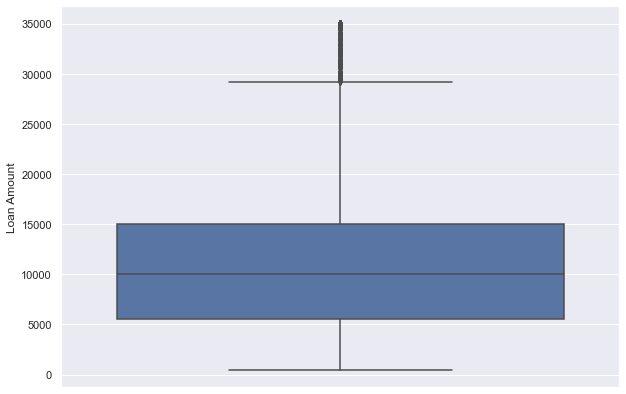

In [47]:
# Setting plot size and boxplot for loan_amnt column
sns.set(rc={'figure.figsize':(10,7)})
grph = sns.boxplot(y=master_loan.loan_amnt)
grph.set(ylabel='Loan Amount')
plt.show()

Observations:
  1. Loans vary between 0 to 35000.
  2. Mean of loan is approx 10000.

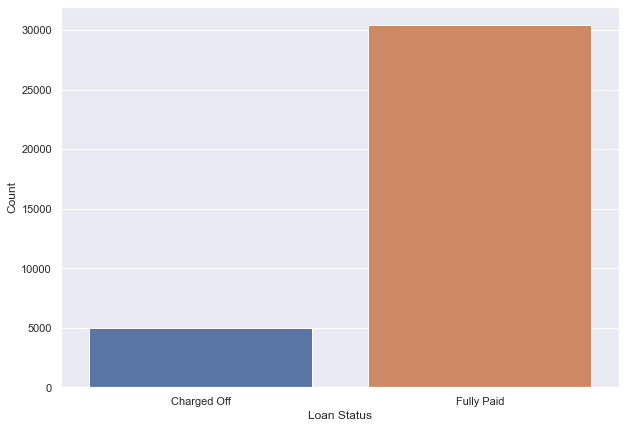

In [48]:
# loan_status countplot
grph = sns.countplot(x=master_loan.loan_status,data=master_loan)
grph.set(xlabel='Loan Status',ylabel='Count')
plt.show()

In [49]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

Observation:
  1. Most loans are fully paid.
  2. Charged Off percentage approximately 14% 

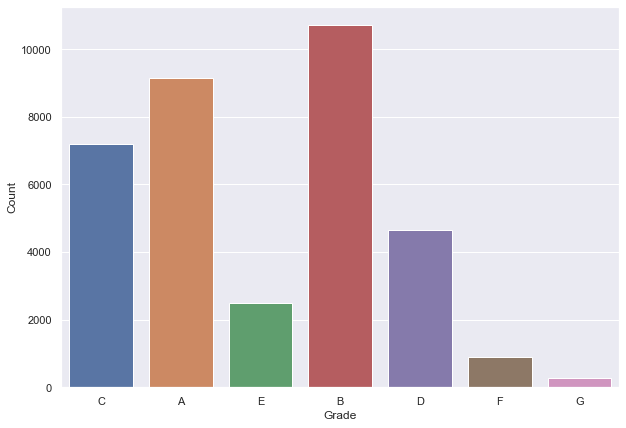

In [50]:
# Grade countplot
grph = sns.countplot(x=master_loan.grade,data=master_loan)
grph.set(xlabel='Grade',ylabel='Count')
plt.show()

Observations :
  1. Most loans are of A and B grades

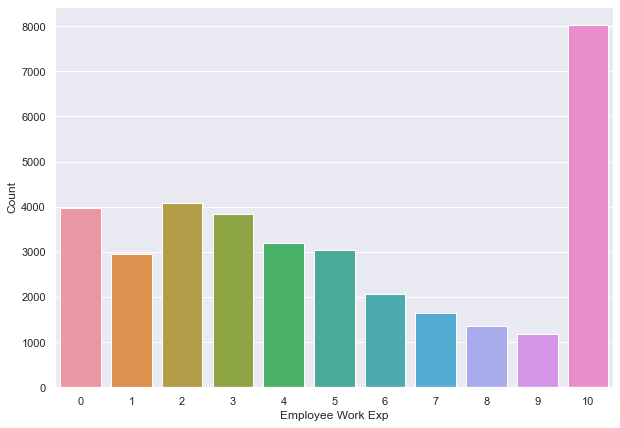

In [51]:
# Work Experience countplot
grph = sns.countplot(x=master_loan.emp_length,data=master_loan)
grph.set(xlabel='Employee Work Exp',ylabel='Count')
plt.show()

Observation :
  1. Majority of the employees applying for loan is having more than 10 years of work experience

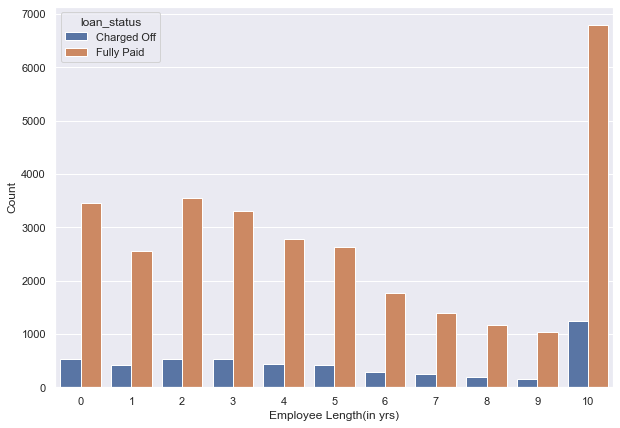

In [52]:
# # Work Experience countplot with Loan Status
grph = sns.countplot(x = 'emp_length',hue='loan_status', data=master_loan)
grph.set(xlabel='Employee Length(in yrs)', ylabel='Count')
plt.show()

/Users/hireshdandekar/.pyenv/versions/3.7.7/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


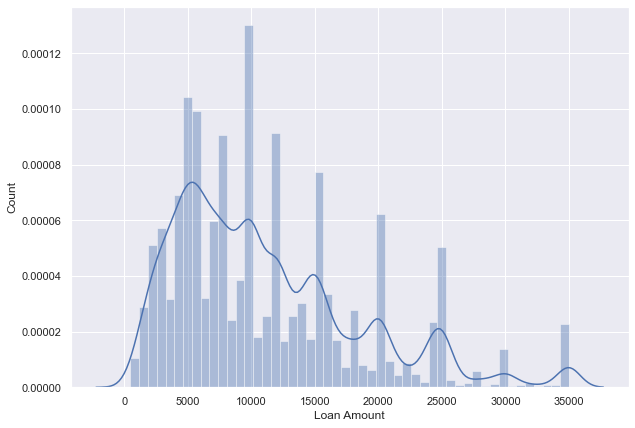

In [53]:
# Loan amount displot
grph = sns.distplot(master_loan['loan_amnt'])
grph.set(xlabel='Loan Amount', ylabel='Count')
plt.show()

Observations :
    
  1. Most amount of loan is provided between 5000-15000
  

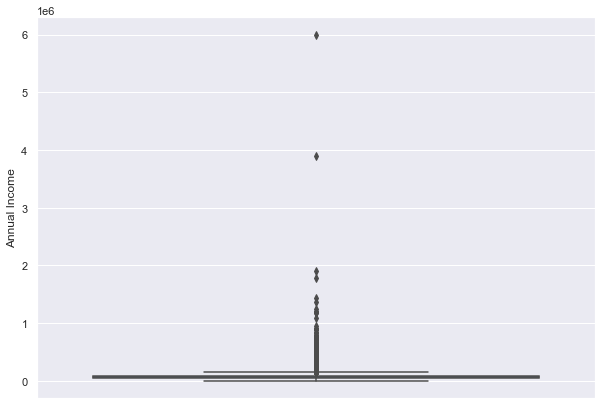

In [54]:
# Annual income box plot
grph = sns.boxplot(y = master_loan.annual_inc,data=master_loan)
grph.set(xlabel='',ylabel='Annual Income')
plt.show()

Observations:
    1. Only 2 sample has more than 30 lakh income

In [55]:
master_loan[master_loan.annual_inc > 3000000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issued_month,issued_year
29639,25000,15500,11430.00082,60,10.62,334.08,B,B3,Lea Regional Hospital/Pecos Valley,3,MORTGAGE,3900000.0,Not Verified,2010-06-01,Fully Paid,home_improvement,Home improvement loan,NM,0.20,0,1999-09-01,3,12,0,3270,10.2,32,0.0,0.0,20044.62,13756.41,15500.0,4544.62,0.0,0.0,0.0,2015-06-01,353.14,2015-06-01,0.0,9,1999,6,2010
30107,5000,5000,5000.00000,36,12.73,167.84,C,C1,post office,10,MORTGAGE,6000000.0,Source Verified,2010-05-01,Fully Paid,home_improvement,home improvment,CA,0.01,0,2001-01-01,1,2,0,1434,37.7,10,0.0,0.0,5514.49,5514.49,5000.0,514.49,0.0,0.0,0.0,2011-04-01,3845.25,2011-05-01,0.0,1,2001,5,2010


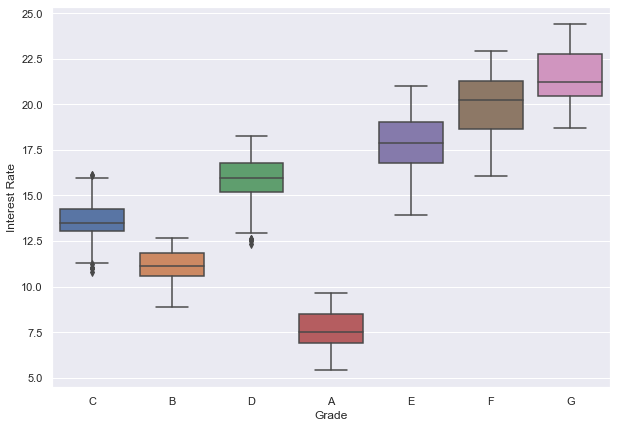

In [56]:
charged_off_df = master_loan[(master_loan.loan_status == "Charged Off")]
grph = sns.boxplot(x = charged_off_df.grade,y = charged_off_df.int_rate)
grph.set(xlabel='Grade',ylabel='Interest Rate')
plt.show()

Observation:
  1. Loan grade is a categorical variable A,B,C..G, and it can be observed that Charged Off Loans are also being default as the grade increases and interest rate increases.

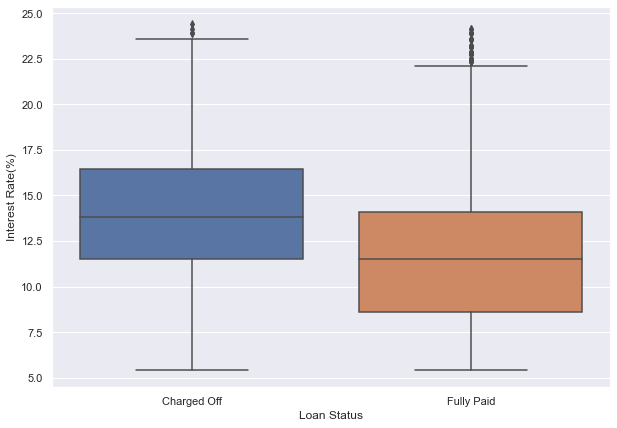

In [57]:
grph= sns.boxplot(y = master_loan.int_rate,x = master_loan.loan_status)
grph.set(xlabel='Loan Status', ylabel = 'Interest Rate(%)')
plt.show()
# plt.ylabel('Interest Rate Percentage')
# plt.xlabel('Loan Status')

Observation :
  1. Higher the interest rate, more is the chances of Defaulter.

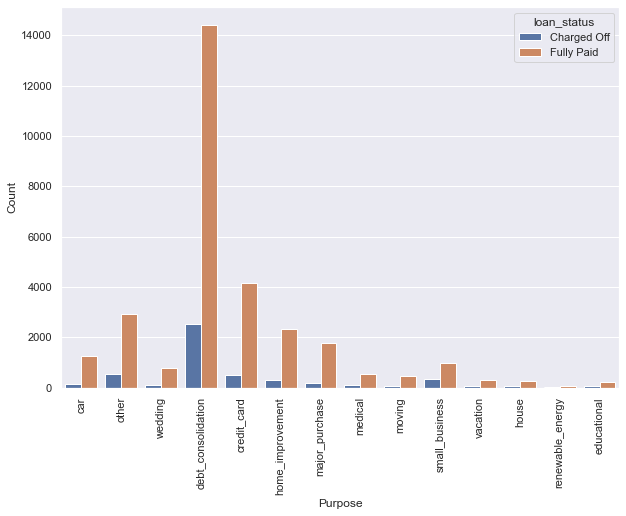

In [58]:
# Loan purpose countplot with loan status
grph = sns.countplot(x = master_loan.purpose,hue=master_loan.loan_status)
grph.set(xlabel='Purpose',ylabel='Count')
plt.xticks(rotation=90)
plt.show()

Observation :
  1. Majority of loan has been given for the debt consolidation purpose

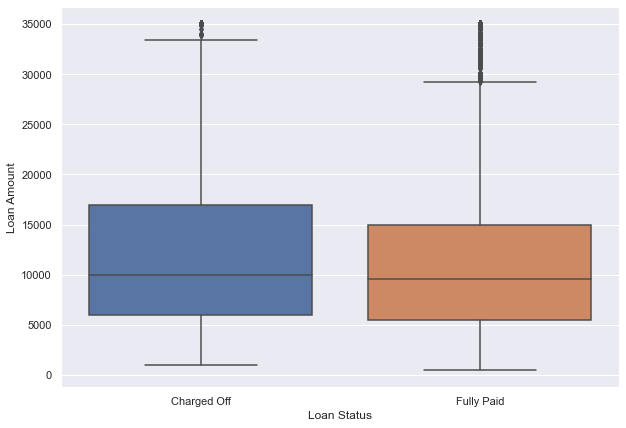

In [59]:

grph = sns.boxplot(y=master_loan.loan_amnt, x = master_loan.loan_status)
grph.set(xlabel='Loan Status',ylabel='Loan Amount')
plt.show()
# plt.ylabel('Loan Amount')
# plt.xlabel('Loan Status')

Observation :
  1. Charged Off Loans average is slight higher than Fully paid average loan amount. 
  2. Higher the loan amount, higher the chance of being a defaulter.

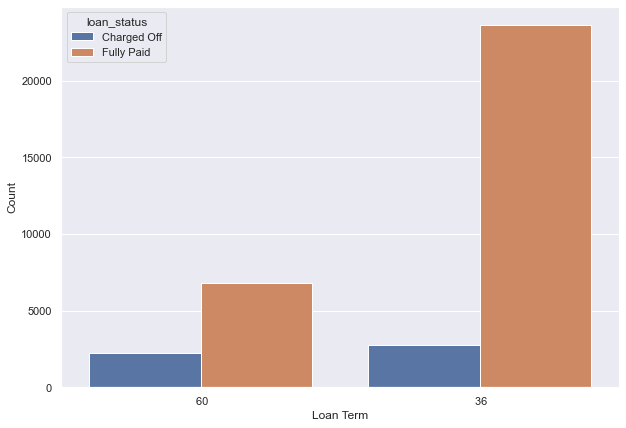

In [60]:
# Loan Term vs Loan status
grph = sns.countplot(x = master_loan.term, hue=master_loan.loan_status)
grph.set(xlabel='Loan Term',ylabel='Count')
plt.show()

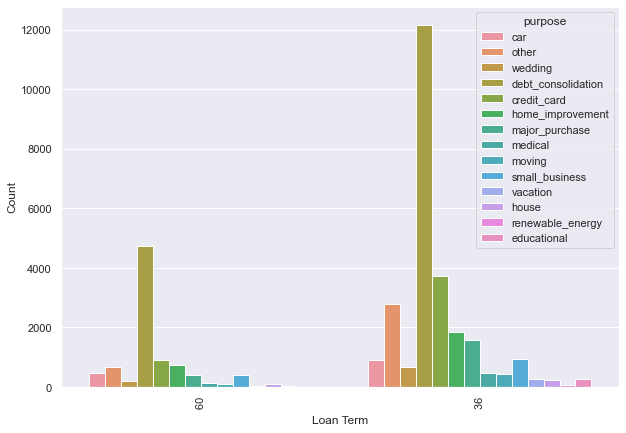

In [61]:
grph = sns.countplot(x = master_loan.term, hue=master_loan.purpose)
plt.xticks(rotation=90)
grph.set(xlabel='Loan Term',ylabel='Count')
plt.show()

In [62]:
master_loan[(master_loan.loan_status.astype(str) == 'Fully Paid') & (master_loan.term.astype(int) == 36)].shape[0]/master_loan[master_loan.term.astype(int) == 36].shape[0]

0.8965007392804337

In [63]:
master_loan[(master_loan.loan_status.astype(str) == 'Fully Paid') & (master_loan.term.astype(int) == 60)].shape[0]/master_loan[master_loan.term.astype(int) == 60].shape[0]

0.753837597330367

Observation :
  1. For 36 months term, defaulter chance is less. Approx 10%
  2. For 60 months term, defaulter chance is more. Approx 25%

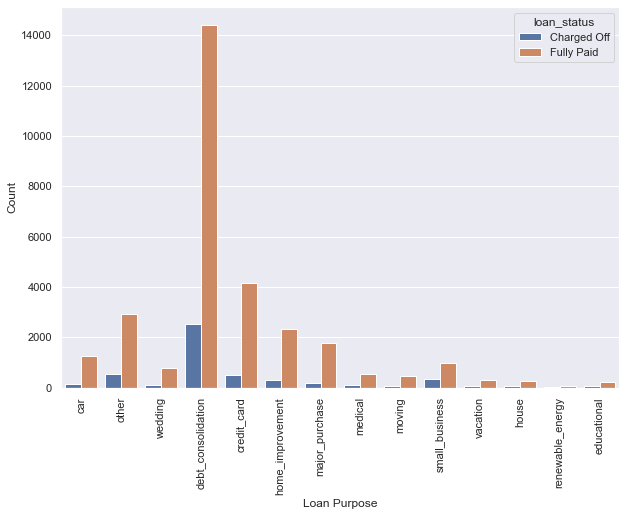

In [64]:
grph = sns.countplot(x=master_loan.purpose,hue = master_loan.loan_status)
grph.set(xlabel='Loan Purpose',ylabel='Count')
plt.xticks(rotation=90)
plt.show()

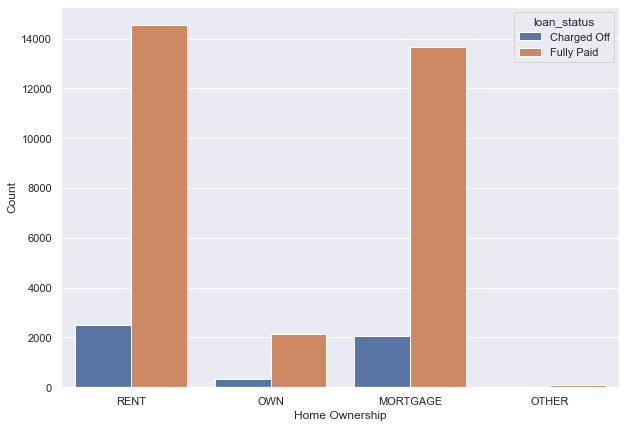

In [65]:
grph=sns.countplot(x=master_loan.home_ownership,hue=master_loan.loan_status)
grph.set(xlabel='Home Ownership',ylabel='Count')
plt.show()

In [66]:
# Loan Status vs addr_state
state_loan_status = (master_loan[master_loan.loan_status == 'Charged Off']).groupby('addr_state').loan_status.count().reset_index()
state_loan_count = master_loan.groupby('addr_state').loan_status.count().reset_index()
# state_loan_count
state_distribution_df = pd.merge(state_loan_count,state_loan_status,on='addr_state')
state_distribution_df['ratio'] = (state_distribution_df.loan_status_y/state_distribution_df.loan_status_x)
# state_distribution_df

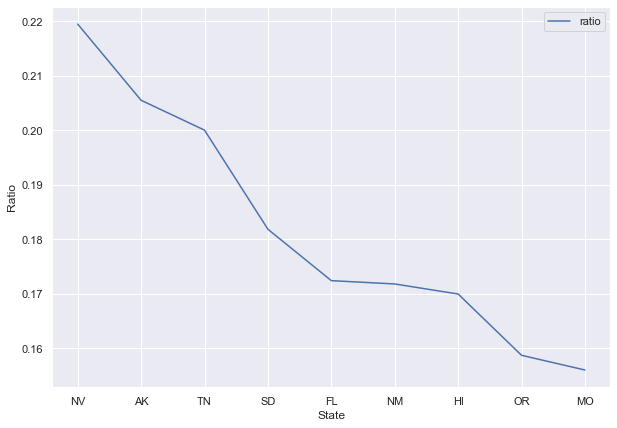

In [67]:
grph = state_distribution_df.sort_values(by = ['ratio'],ascending=False).nlargest(9,'ratio').plot(x = 'addr_state',y = 'ratio')
grph.set(xlabel='State',ylabel='Ratio')
plt.show()

Observation :
  1. NV, AK, TN are the states having high defaulter percentage as compared to other states

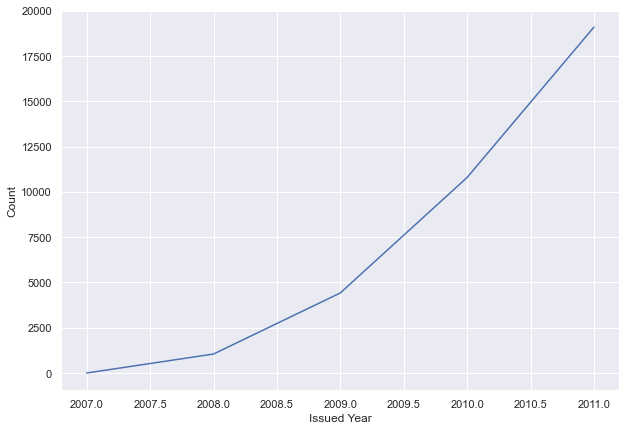

In [68]:
grph=master_loan.groupby('issued_year')['loan_status'].count().plot()
grph.set(xlabel='Issued Year',ylabel='Count')
plt.show()

Observation :
  1. Number of loans taken is increasing from 2007 to 2011

In [69]:
master_loan.groupby('issued_year')['loan_status'].count()

issued_year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: loan_status, dtype: int64

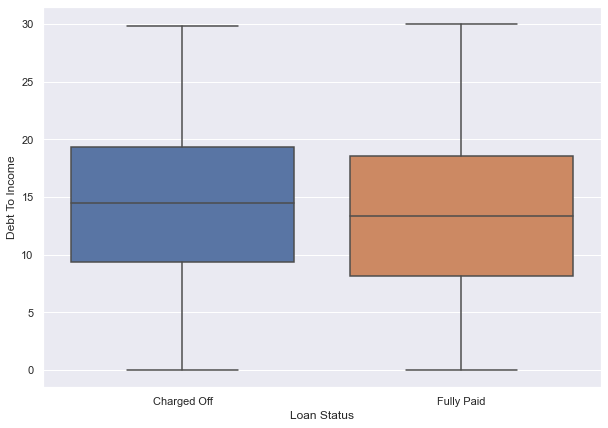

In [70]:
grph = sns.boxplot(y = master_loan.dti,x = master_loan.loan_status)
grph.set(xlabel='Loan Status',ylabel='Debt To Income')
plt.show()

Observation :
  1. In case of high loan amount to annual income ratio, defaulter chances is more.